<a href="https://colab.research.google.com/github/trallala9/animated-chain/blob/main/face_recog_and_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We use Google Colab to run the code. You can use it at your choice. Import necessary libraries. We need the cv2module, to be able to read and display the image, and the MediaPipe module, which exposes the functionality we need to perform the face detection

In [ ]:
!pip install mediapipe

     |████████████████████████████████| 32.2 MB 21 kB/s 


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import math
import mediapipe as mp

Then we will access two submodules face_detection and drawing_utils. The face_detection is used to load all functionality to perform face detection and the drawing_utils is used to draw the detected face over the image.
mp_face_detec

In [ ]:
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

At first, we take an image as an input. Here we use two types of image
(i)image that contains face within two meters
(ii)image that contains face within five meters.
We use files from colab to load images directly from our local directory. You can also use cv2.imread() to load images when you work in your local computer.

In [ ]:
from google.colab import files
uploaded_short_range = files.upload()

Saving 2.png to 2.png


In [ ]:
from google.colab import files
uploaded_full_range = files.upload()

Saving 3.jpg to 3.jpg


Now we are going to resize the images and show the images. To show the image we have to use cv2_imshow module from colab or cv2.imshow(frame name, iamge) in case of working in a local machine. We may use the below code to resize and showing the image in google colab.

2.png


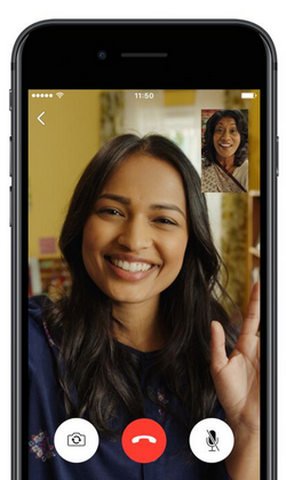

3.jpg


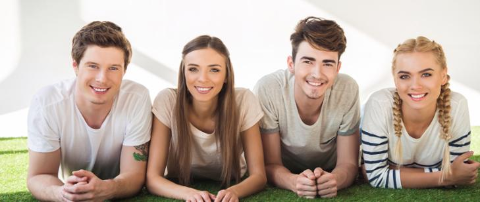

In [ ]:
DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480
def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  cv2_imshow(img)
 
# Preview the images.
short_range_images = {name: cv2.imread(name) for name in uploaded_short_range.keys()}
for name, image in short_range_images.items():
  print(name)   
  resize_and_show(image)
 
full_range_images = {name: cv2.imread(name) for name in uploaded_full_range.keys()}
for name, image in full_range_images.items():
  print(name)   
  resize_and_show(image)

Now, we will draw landmarks on the face.
We may change the value of the thickness and circle_radius as follows.
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

In [15]:
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

Face detections of 2.png:


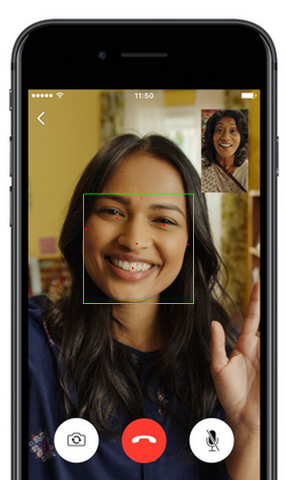

In [16]:
# Run MediaPipe Face Detection with short range model.

with mp_face_detection.FaceDetection(
    min_detection_confidence=0.5, model_selection=0) as face_detection:
  for name, image in short_range_images.items():
    # Convert the BGR image to RGB and process it with MediaPipe Face Detection.
    results = face_detection.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Draw face detections of each face.
    print(f'Face detections of {name}:')
    if not results.detections:
      continue
    annotated_image = image.copy()
    for detection in results.detections:
      mp_drawing.draw_detection(annotated_image, detection)
    resize_and_show(annotated_image)

Face detections of 3.jpg:


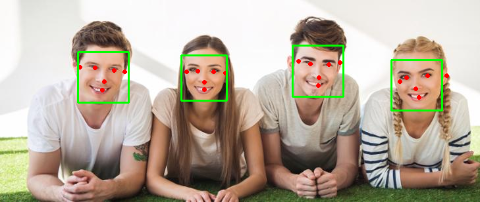

In [17]:
with mp_face_detection.FaceDetection(
    min_detection_confidence=0.5, model_selection=1) as face_detection:
  for name, image in full_range_images.items():
    # Convert the BGR image to RGB and process it with MediaPipe Face Detection.
    results = face_detection.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Draw face detections of each face.
    print(f'Face detections of {name}:')
    if not results.detections:
      continue
    annotated_image = image.copy()
    for detection in results.detections:
      mp_drawing.draw_detection(annotated_image, detection)
    resize_and_show(annotated_image)